# 지금까지 정리


딥러닝 프레임워크를 공부할 떄는 먼저, 4가지를 어떻게 하면 되는지를 알아보면 된다!

![](../statics/imgs/4elems_dlFramework.png)

> - Tensor 다루기
> - 최적화 : `tf.GradientTape` 을 통해 최적화
> - 연산정의(Modeling)
> - 데이터 다루기

딥러닝 프로젝트를 수행하기 위해서 아래 4 단계를 구현 하면 된다. 

![](../statics/imgs/dl_flow.png)
> Data -> Preprocess -> Model -> Evaluation
>   -   preprocess : 데이터 검증, 전처리, 데이터 증강
>   -   Model : modeling , 학습로직
>   -   Evaluation : 학습과정 추적, 후처리, 모델 검증

## 모델을 정의 하는 방법! 
3가지만!

1. Sequencial 사용하기  (우리가 지금까지 모델을 만들던 방식) : 제일 간단하지만 자유도가 떨어진다.
2. Functional API model : 1번보다 자유도가 높고, 3번보다 낮다. 대부분의 논문을 구현할 수 있다.
3. Sub class model : 자유도가 가장 높지만 코드가 길어지고, 초보자에게는 어려운 것

# Convolutional Neural Network; CNN (VGG19)
- convolution 연산을 이용한 neural network 이다.
- vgg 는 cnn의 종류중 하나
- CNN 은 주로 이미지 데이터에 사용된다.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
np.random.seed(7777)
tf.random.set_seed(7777)

### Convolutional Neural Network

![](../statics/imgs/convnets-feature-maps.png)

### Filter to an image (Convolution layer)


![](../statics/imgs/cnn.png)


## 이번 시간에는 VGGNet를 구현 해보겠습니다. 

### VGGNet 

 VGGNet은 2014년 ILSVRC에서 비록 다음에 배울 GoogLeNet에 밀려 2위를 했지만, 훨씬 간단한 구조로 이해와 변형이 쉽다는 장점이 있어 많이 응용된 모델이다.

VGGNet의 개발자들은 모델의 깊이가 성능에 얼마나 영향을 끼칠지에 집중하여 연구하였다고 논문에서 밝혔다. 깊은 네트워크를 가지고 있지만, GoogLeNet과 비교하면, 구조가 매우 간단하다. 깊이에 따른 변화를 비교하기 위해, 3x3의 작은 필터 크기를 사용했고, 모델 깊이와 구조에 변화를 주어 실험하였다. 논문에서 언급한 것은 총 6개의 모델로 내용은 다음 표와 같다. 표의 "D" 구조를 VGG16, "E" 구조를 VGG19라고 부른다. 다음 표에서, "conv 3, 64" 는 3x3 컨볼루션(convolution) 연산에 출력 피쳐맵 갯수는 64개라는 뜻이다. 

|  A  |  A-LRN  |   B   |   C   |   D   |   E   |
|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|
|11개의 레이어|11개의 레이어|13개의 레이어|16개의 레이어|16개의 레이어|19개의 레이어|
|conv 3, 64|conv 3, 64|conv 3, 64|conv 3, 64|conv 3, 64|conv 3, 64| 
|          |LRN       |conv 3, 64|conv 3, 64|conv 3, 64|conv 3, 64|
| maxpool 2| maxpool 2| maxpool 2| maxpool 2| maxpool 2| maxpool 2|
|conv 3, 128|conv 3, 128|conv 3, 128|conv 3, 128|conv 3, 128|conv 3, 128|
|           |           |conv 3, 128|conv 3, 128|conv 3, 128|conv 3, 128|
| maxpool 2| maxpool 2| maxpool 2| maxpool 2| maxpool 2| maxpool 2|
|conv 3, 256|conv 3, 256|conv 3, 256|conv 3, 256|conv 3, 256|conv 3, 256|
|conv 3, 256|conv 3, 256|conv 3, 256|conv 3, 256|conv 3, 256|conv 3, 256|
|           |           |           |conv 1, 256|conv 3, 256|conv 3, 256|
|           |           |           |           |           |conv 3, 256|
| maxpool 2| maxpool 2| maxpool 2| maxpool 2| maxpool 2| maxpool 2|
|conv 3, 512|conv 3, 512|conv 3, 512|conv 3, 512|conv 3, 512|conv 3, 512|
|conv 3, 512|conv 3, 512|conv 3, 512|conv 3, 512|conv 3, 512|conv 3, 512|
|           |           |           |conv 1, 512|conv 3, 512|conv 3, 512|
|           |           |           |           |           |conv 3, 512|
| maxpool 2| maxpool 2| maxpool 2| maxpool 2| maxpool 2| maxpool 2|
|conv 3, 512|conv 3, 512|conv 3, 512|conv 3, 512|conv 3, 512|conv 3, 512|
|conv 3, 512|conv 3, 512|conv 3, 512|conv 3, 512|conv 3, 512|conv 3, 512|
|           |           |           |conv 1, 512|conv 3, 512|conv 3, 512|
|           |           |           |           |           |conv 3, 512|
| maxpool 2| maxpool 2| maxpool 2| maxpool 2| maxpool 2| maxpool 2|
| FCN 4096  | FCN 4096  | FCN 4096  | FCN 4096  | FCN 4096  | FCN 4096  |
| FCN 4096  | FCN 4096  | FCN 4096  | FCN 4096  | FCN 4096  | FCN 4096  |
| FCN 1000  | FCN 1000  | FCN 1000  | FCN 1000  | FCN 1000  | FCN 1000  |
 

### Dataloader

 - Flatten => 채널 차원 추가로 변경 
 
 (Convolution Layer는 주로 이미지데이터처리를 위해 사용되기 때문에, `컬러이미지는 (height, width, 3)` `흑백은 (height, width, 1)`로 사용한다.)
 
 
       ex) (num_data, 28, 28) => (num_data, 28, 28, 1)
 

In [3]:
class DataLoader():

    def __init__(self):
        (self.train_x, self.train_y), \
            (self.test_x, self.test_y) = tf.keras.datasets.mnist.load_data()

        # (train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

    def validate_pixel_scale(self, x):
        return 255 >= x.max() and 0 <= x.min()

    def scale(self, x):
        return (x / 255.0).astype(np.float32)

    def preprocess_dataset(self, dataset):
        feature, target = dataset

        validated_x = np.array([x for x in feature if self.validate_pixel_scale(x)])
        validated_y = np.array([y for x,y in zip(feature, target) if self.validate_pixel_scale(x)])

        # scale
        scaled_x = np.array([self.scale(x) for x in validated_x])
        
        # flatten   CNN에서는 안쓴다고 함
        # flatten_x = scaled_x.reshape((scaled_x.shape[0], -1))

        # expand
        expanded_x = scaled_x[:, :, :, np.newaxis]
                                        # 가짜 차원 하나를 추가한다.
                              # 인덱스 전체
                                # height
                                    # width

        # label encoding
        ohe_y = np.array([tf.keras.utils.to_categorical(y, num_classes=10) for y in validated_y])

        return expanded_x, ohe_y    # expanded_x 로 변경
    
    def get_train_dataset(self):
        return self.preprocess_dataset((self.train_x, self.train_y))
    
    def get_test_dataset(self):
        return self.preprocess_dataset((self.test_x, self.test_y))

In [4]:
mnist_loader = DataLoader()

train_x, train_y = mnist_loader.get_train_dataset()

test_x, test_y = mnist_loader.get_train_dataset()   # mnist_loader.get_test_dataset()

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

# 3차원 이미지로 바뀌고, 10개의 ohe 된 레이블로 바뀌었다.

(60000, 28, 28, 1)
(60000, 28, 28, 1)
(60000, 10)
(60000, 10)


## VGGNet에서 사용되는 Layer들

 - `tf.keras.layers.Conv2D`
 - `tf.keras.layers.Activation`
 - `tf.keras.layers.MaxPool2D`
 - `tf.keras.layers.Flatten`
 - `tf.keras.layers.Dense`

#### Conv2D

![](../statics/imgs/conv2D.png)

- filters: layer에서 사용할 Filter(weights)의 갯수
- kernel_size: Filter(weights)의 사이즈  
- strides: 몇 개의 pixel을 skip 하면서 훑어지나갈 것인지 (출력 피쳐맵의 사이즈에 영향을 줌)
- padding: zero padding을 만들 것인지. VALID는 Padding이 없고, SAME은 Padding이 있음 (출력 피쳐맵의 사이즈에 영향을 줌)
- activation: Activation Function을 지정

In [5]:
tf.keras.layers.Conv2D(64, (3,3), 1, padding = 'same', activation='relu')
                      # filters 개수
                            # kernel_size : 정사각형(n * n)인 경우 n만 써도 된다.
                                 # strides
                                     # padding 여부
                                                        # activation 지정

#### MaxPool2D

![](../statics/imgs/Maxpool2D.png)

- pool_size: Pooling window 크기
- strides: 몇 개의 pixel을 skip 하면서 훑어지나갈 것인지 
- padding: zero padding을 만들 것인지

In [6]:
tf.keras.layers.MaxPool2D

keras.layers.pooling.MaxPooling2D

#### Flatten

![](../statics/imgs/Flatten.png)

In [7]:
tf.keras.layers.Flatten

keras.layers.core.flatten.Flatten

#### Dense

![](../statics/imgs/Dense.png)

- units : 노드 갯수
- activation : 활성화 함수
- use_bias : bias 를 사용 할 것인지
- kernel_initializer : 최초 가중치를 어떻게 세팅 할 것인지
- bias_initializer : 최초 bias를 어떻게 세팅 할 것인지

In [8]:
tf.keras.layers.Dense

keras.layers.core.dense.Dense

## Layer들을 이용해 모델 만들기 - Sequencial 방식

In [9]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [10]:
model = tf.keras.Sequential()

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-05-23 19:32:02.691492: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-23 19:32:02.691784: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape = (28,28,1)))
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))      # 10은 우리가 사용하는 클래스 개수


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

In [13]:
# 학습 시키기
lr = 0.03
opt = tf.keras.optimizers.Adam(lr)
loss = tf.keras.losses.categorical_crossentropy

model.compile(optimizer=opt, loss=loss, metrics = ['accuracy'])
                                        # metrics 는 한개만 있다 해도 항상 리스트 형식으로 넣어야 한다.
                            # loss도 리스트로 받을 수는 있다.

In [14]:
hist = model.fit(train_x, train_y, epochs=2, batch_size=128, validation_data=(test_x, test_y))

Epoch 1/2


2022-05-23 19:32:03.415095: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-23 19:32:03.683066: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 0.7485 - accuracy: 0.7818

2022-05-23 19:32:17.628062: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 19s 37ms/step - loss: 0.7485 - accuracy: 0.7818 - val_loss: 0.2714 - val_accuracy: 0.9204
Epoch 2/2
469/469 [==============================] - 17s 35ms/step - loss: 0.2475 - accuracy: 0.9249 - val_loss: 0.2194 - val_accuracy: 0.9317


In [15]:
hist.history

{'loss': [0.7485263347625732, 0.24754241108894348],
 'accuracy': [0.7817833423614502, 0.9249333143234253],
 'val_loss': [0.2713930010795593, 0.21938341856002808],
 'val_accuracy': [0.9203667044639587, 0.9316666722297668]}

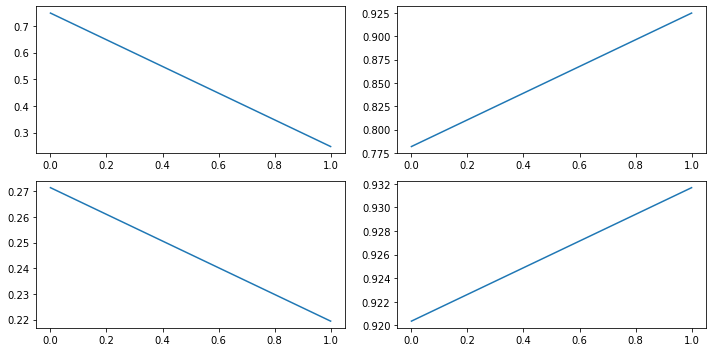

In [16]:
plt.figure(figsize=(10,5))
plt.subplot(221)    #2 * 2 * 1
plt.plot(hist.history['loss'])
plt.subplot(222)
plt.plot(hist.history['accuracy'])
plt.subplot(223)
plt.plot(hist.history['val_loss'])
plt.subplot(224)
plt.plot(hist.history['val_accuracy'])

plt.tight_layout()
plt.show()